# Titanic - Machine Learning from Disaster

## Ensemble Random Forests

In [1]:
import pandas as pd
import numpy as np

from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

## Constants

In [2]:
PATH_PROCESSED_TRAIN_CSV = "data/processed_train.csv"
PATH_PROCESSED_TEST_CSV = "data/processed_test.csv"
PATH_MY_PREDICTION_CSV = "data/my_prediction.csv"

## Data Collection

In [3]:
train_df = pd.read_csv(PATH_PROCESSED_TRAIN_CSV)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup
0,0,3,1,22.0,1,0,523,7.25,2,2,73,1,8,0,0
1,1,1,0,38.0,1,0,596,71.28,0,3,136,1,2,0,0
2,1,3,0,26.0,0,0,669,7.92,2,1,251,0,8,1,0
3,1,1,0,35.0,1,0,49,26.55,2,3,198,1,2,0,0
4,0,3,1,35.0,0,0,472,8.05,2,2,11,0,8,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,101,13.00,2,4,406,0,8,1,0
887,1,1,0,19.0,0,0,14,30.00,2,1,221,0,1,1,0
888,0,3,0,29.0,1,2,675,11.72,2,1,293,3,8,0,0
889,1,1,1,26.0,0,0,8,30.00,0,2,52,0,2,1,0


In [4]:
test_df = pd.read_csv(PATH_PROCESSED_TEST_CSV)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup
0,892,3,1,34.5,0,0,152,7.83,1,2,172,0,8,1,0
1,893,3,0,47.0,1,0,221,7.00,2,3,339,1,2,0,0
2,894,2,1,62.0,0,0,73,9.69,1,2,231,0,8,1,2
3,895,3,1,27.0,0,0,147,8.66,2,2,344,0,2,1,0
4,896,3,0,22.0,1,1,138,12.29,2,3,150,2,8,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,1,29.0,0,0,267,8.05,2,2,302,0,8,1,0
414,1306,1,0,39.0,0,0,324,108.90,0,4,244,0,8,1,0
415,1307,3,1,38.5,0,0,346,7.25,2,2,287,0,8,1,0
416,1308,3,1,29.0,0,0,220,8.05,2,2,326,0,8,1,0


### Feature Selection

_Legend:_

X: Feature Variables (or Independent Variables)

y: Target Variables (or dependent Variables)

In [5]:
X = train_df.drop(["Survived"], axis=1)
y = train_df["Survived"]

### Split dataset into train and test sets

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [7]:
X_train.shape, y_train.shape

((668, 14), (668,))

In [8]:
X_test.shape, y_test.shape

((223, 14), (223,))

## Random Forests

In [9]:
from common import functions as func

from sklearn.ensemble import RandomForestClassifier

**Getting Best Hyperparameter Optimization**

*Note: The execution of the code below may take a few minutes or hours.*

*Uncomment and run it when you need to optimize hyperparameters.*

In [10]:
# clf = RandomForestClassifier()

# space = dict()
# space['n_estimators'] = [n for n in range(200)]
# space['criterion'] = ["gini", "entropy"]
# space['max_depth'] = [n for n in range(10)]
# space['min_samples_split'] = [n for n in range(10)]
# space['min_samples_leaf'] = [n for n in range(10)]
# space['max_leaf_nodes'] = [n for n in range(10)]
# space['min_impurity_decrease'] = [n for n in np.arange(0.1, 1.0, 0.1)]
# space['random_state'] = [n for n in range(10)]

# func.show_best_hyperparameter_optimization(clf, space, X_train, y_train)

In [11]:
clf = RandomForestClassifier(    
)
pipeline = make_pipeline(
    StandardScaler(),
    clf
)

_ = pipeline.fit(X_train, y_train)

__Check the most relevant features for the training model__

In [12]:
func.get_feature_importances(clf, X_train)

,Features,Relevance (%)
1,Sex,19
5,Ticket,14
9,FamilyName,13
6,Fare,12
2,Age,11
8,Title,10
0,Pclass,5
10,Kinship,4
11,Deck,4
3,SibSp,2


__Predict and show model result__

In [13]:
y_predict = pipeline.predict(X_test)
func.show_model_result(pipeline, X, y, y_test, y_predict)


Computing cross-validated metrics
----------------------------------------------------------------------
Scores: [0.83240223 0.82022472 0.83707865 0.80898876 0.85955056]
Mean = 0.83 / Standard Deviation = 0.02

Confunsion Matrix
----------------------------------------------------------------------
[[113  21]
 [ 20  69]]

Classification Report
----------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.85      0.84      0.85       134
           1       0.77      0.78      0.77        89

    accuracy                           0.82       223
   macro avg       0.81      0.81      0.81       223
weighted avg       0.82      0.82      0.82       223

----------------------------------------------------------------------
Accuracy: 0.82
Precicion: 0.77
Sensitivity aka Recall: 0.78
F1-Score: 0.77


**Show Curve ROC and Area Under the ROC**

----------------------------------------------------------------------
AUC-Area Under the ROC Curve: 0.81
----------------------------------------------------------------------


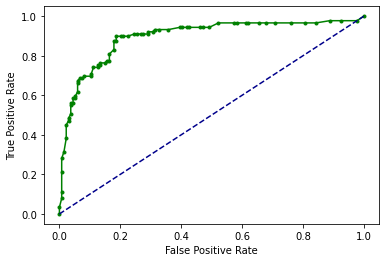

In [14]:
func.show_curve_roc(pipeline, X_test, y_test, y_predict)

__Compare Ground Truth vs Prediction Model__

In [15]:
func.get_error_prediction(X_test, y_test, y_predict)

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,FamilyName,Kinship,Deck,Alone,AgeGroup,Ground Truth,Prediction
137,1,1,37.0,1,0,49,26.55,2,2,198,1,2,0,0,0,1
621,1,1,42.0,1,0,56,52.55,2,2,311,1,3,0,0,1,0
447,1,1,34.0,0,0,45,26.55,2,2,544,0,8,1,0,1,0
192,3,0,19.0,1,0,406,7.85,2,1,14,1,8,0,0,1,0
673,2,1,31.0,0,0,145,13.00,2,2,645,0,8,1,0,1,0
396,3,0,31.0,0,0,414,7.85,2,1,454,0,8,1,0,0,1
235,3,0,29.0,0,0,677,7.55,2,1,237,0,8,1,0,0,1
204,3,1,18.0,0,0,530,8.05,2,2,117,0,8,1,0,1,0
23,1,1,28.0,0,0,42,35.50,2,2,568,0,0,1,0,1,0
772,2,0,57.0,0,0,619,5.25,2,3,360,0,4,1,0,0,1


### Predict Test Dataset

In [16]:
XX = test_df.drop(["PassengerId"], axis=1)
passenger_ids = test_df["PassengerId"]

In [17]:
yy_predict = pipeline.predict(XX)

__Creates dataset prediction__

In [18]:
prediction_df = pd.DataFrame({"PassengerId": passenger_ids, "Survived": yy_predict})

In [19]:
prediction_df.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,1
4,896,1


__Save Dataframe with promising transformations__

In [20]:
prediction_df.to_csv(PATH_MY_PREDICTION_CSV, index=False)